# Predicting the Next Hit on Billboard Hot 100

This project utilizes data from the EchoNest API to get acoustic features, Musixmatch API to get lyrics, and Billboard API to get ranking of songs.

*****
## Step 1: collect billboard data and do initial exploratory analysis
Songs date as far back as 1958, where I found the first available chart for Hot 100.

In [91]:
# pip install billboard.py

# in this part we want to build up a data frame of all available charts on billboard
import billboard
import pandas as pd

Hot_10 = pd.DataFrame(columns = ['date','title','artist','rank','weeks','change_in_rank','spotifyID'
    ])


chart = billboard.ChartData('hot-100',date = '2010-12-25') # this breaks sometimes so have to rerun and change date
date = chart.date
prev_year,prev_month = date.split('-')[0],date.split('-')[1]

while chart.previousDate:
    year,month = date.split('-')[0],date.split('-')[1]
    if prev_month != month:
        print 'chart year:{},month:{}'.format(year,month)
    for i in range(10):
        song = chart[i]
        Hot_10 = Hot_10.append([(date,song.title,song.artist,song.rank,song.weeks,song.change,song.spotifyID)])
    chart = billboard.ChartData('hot-100',chart.previousDate)
    prev_year,prev_month = year,month
    date = chart.date
    no += 1


chart year:2017,month:02
chart year:2017,month:01
chart year:2016,month:12
chart year:2016,month:11
chart year:2016,month:10
chart year:2016,month:09
chart year:2016,month:08
chart year:2016,month:07
chart year:2016,month:06
chart year:2016,month:05
chart year:2016,month:04
chart year:2016,month:03
chart year:2016,month:02
chart year:2016,month:01
chart year:2015,month:12
chart year:2015,month:11
chart year:2015,month:10
chart year:2015,month:09
chart year:2015,month:08
chart year:2015,month:07
chart year:2015,month:06
chart year:2015,month:05
chart year:2015,month:04
chart year:2015,month:03
chart year:2015,month:02
chart year:2015,month:01
chart year:2014,month:12
chart year:2014,month:11
chart year:2014,month:10
chart year:2014,month:09
chart year:2014,month:08
chart year:2014,month:07
chart year:2014,month:06
chart year:2014,month:05
chart year:2014,month:04
chart year:2014,month:03
chart year:2014,month:02
chart year:2014,month:01
chart year:2013,month:12
chart year:2013,month:11


In [125]:
chart = billboard.ChartData('hot-100',date = '1958-08-09') # this breaks sometimes so have to rerun and change date
date = chart.date
prev_year,prev_month = date.split('-')[0],date.split('-')[1]

while chart.previousDate:
    year,month = date.split('-')[0],date.split('-')[1]
    if prev_month != month:
        print 'chart year:{},month:{}'.format(year,month)
    for i in range(10):
        song = chart[i]
        Hot_10 = Hot_10.append([(date,song.title,song.artist,song.rank,song.weeks,song.change,song.spotifyID)])
    chart = billboard.ChartData('hot-100',chart.previousDate)
    prev_year,prev_month = year,month
    date = chart.date
    no += 1

AttributeError: 'NoneType' object has no attribute 'string'

In [ ]:
Hot_10_dropped = Hot_10.drop(Hot_10.columns.values[7:],axis=1)
Hot_10_dropped.columns = ['date','title','artist','rank','weeks','change_in_rank','spotifyID']
Hot_10_dropped.to_pickle('Billboard_data')

In [1]:
import pandas as pd
top10 = pd.read_pickle('Billboard_data')
top10.head()

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2017-03-18,Shape Of You,Ed Sheeran,1.0,8.0,0,0FE9t6xYkqWXU2ahLh6D8X
0,2017-03-18,Bad And Boujee,Migos Featuring Lil Uzi Vert,2.0,16.0,0,1FvU97lrWOG2NRxErh6OZz
0,2017-03-18,I Don't Wanna Live Forever (Fifty Shades Darker),Zayn / Taylor Swift,3.0,12.0,0,6yIdwnpDHufLWgQcveTPMk
0,2017-03-18,That's What I Like,Bruno Mars,4.0,7.0,0,0KKkJNfGyhkQ5aFogxQAPU
0,2017-03-18,Something Just Like This,The Chainsmokers & Coldplay,5.0,2.0,+51,


## Some exploratory data analysis on billboard data to answer 5 questions

### question1: which artist has dominated top 1 for longest weeks in the history? Is it Beatles??

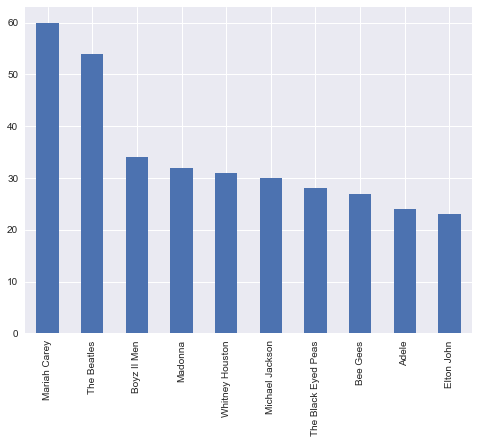

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,6)
top1 = top10[top10['rank']==1.0]
top1.artist.value_counts()[:10].plot(kind='bar')

Turns out Mariah Carey has more times ranked 1 on billboard history! Also this result is not considering many collaborated song Mariah Carey have with Boyz II Men and other artists.

Also some very recent singers like The Black Eyed Peas and Adele both have more than 20 times ranked top 1

### question2: which song is most liked for the longest time? or it topped 1st place for longest continuous weeks, and how long is it? Which song is among top 10 for most of the weeks(not continuously)?

In [73]:
# continuous top 1
top1.head(10)
titles = top1.title.values
artists = top1.artist.values
continuous_weeks = []
count = 1

for i in xrange(1,len(titles)):
    if titles[i] == titles[i-1]:
        count += 1
    else:
        continuous_weeks.append((titles[i-1]+u' by '+artists[i-1],count))
        count = 1
continuous_weeks.sort(key=lambda x:-x[1])
continuous_weeks[:10]

[(u'One Sweet Day by Mariah Carey & Boyz II Men', 16),
 (u'Uptown Funk! by Mark Ronson Featuring Bruno Mars', 14),
 (u'I Gotta Feeling by The Black Eyed Peas', 14),
 (u'Candle In The Wind 1997/Something About The Way You Look Tonight by Elton John',
  14),
 (u'Macarena (Bayside Boys Mix) by Los Del Rio', 14),
 (u'I ll Make Love To You by Boyz II Men', 14),
 (u'I Will Always Love You (From "The Bodyguard") by Whitney Houston', 14),
 (u'The Boy Is Mine by Brandy', 13),
 (u'End Of The Road (From "Boomerang") by Boyz II Men', 13),
 (u'Closer by The Chainsmokers Featuring Halsey', 12)]

Record high goes to 'One Sweet Day' by Mariah Carey & Boyz II Men, lasted four whole months! That's impressive!

How about top 10 songs counting not continuously? Basically just count how many times that song appeared in top 10

In [102]:
# top10.title.value_counts()[:10]
top10.groupby(['title','artist']).size().sort_values(ascending=False)[:10]

title                                artist                                   
How Do I Live                        LeAnn Rimes                                  32
Closer                               The Chainsmokers Featuring Halsey            31
Uptown Funk!                         Mark Ronson Featuring Bruno Mars             31
Smooth                               Santana Featuring Rob Thomas                 30
Party Rock Anthem                    LMFAO Featuring Lauren Bennett & GoonRock    29
Foolish Games/You Were Meant For Me  Jewel                                        28
Truly Madly Deeply                   Savage Garden                                26
Un-Break My Heart                    Toni Braxton                                 25
Apologize                            Timbaland Featuring OneRepublic              25
The Twist                            Chubby Checker                               25
dtype: int64

In this way we get to know more less famous artists, and we also learn this:

being able to stay the longest weeks as top 1 does not necessarily mean you can also stay the longest in top 10 chart. For example in the above table, we can't find any Mariah Carey song.

### question3: which artist's tracks likes to bomb the chart?(i.e. become top 1 once released)

In [88]:
# define the bomb: rank = 1 and weeks = 1, if on chart for the first week it has ranked top 1 then it's a bomb
top1[top1.weeks== 1.0]

,date,title,artist,rank,weeks,change_in_rank,spotifyID
0,2017-01-28,Shape Of You,Ed Sheeran,1.0,1.0,Hot Shot Debut,0FE9t6xYkqWXU2ahLh6D8X
0,2016-05-28,Can't Stop The Feeling!,Justin Timberlake,1.0,1.0,Hot Shot Debut,6JV2JOEocMgcZxYSZelKcc
0,2016-02-20,Pillowtalk,Zayn,1.0,1.0,Hot Shot Debut,0IKK48xF4eEdfofyaeKWWO
0,2015-11-14,Hello,Adele,1.0,1.0,Hot Shot Debut,1MDoll6jK4rrk2BcFRP5i7
0,2015-09-19,What Do You Mean?,Justin Bieber,1.0,1.0,Hot Shot Debut,1ds2QsfhAAfRiaFMGDzrdb
0,2014-09-06,Shake It Off,Taylor Swift,1.0,1.0,Hot Shot Debut,7zCCVZBgy3Ij5fX7S4fs60
0,2013-03-02,Harlem Shake,Baauer,1.0,1.0,Hot Shot Debut,2eP6GhdRE1Ydnw2uXzo7q8
0,2012-03-03,Part Of Me,Katy Perry,1.0,1.0,Hot Shot Debut,1nZzRJbFvCEct3uzu04ZoL
0,2011-02-26,Born This Way,Lady Gaga,1.0,1.0,Hot Shot Debut,0FC7X3BRdEJC8L4ZEUAv2Q
0,2011-01-29,Hold It Against Me,Britney Spears,1.0,1.0,Hot Shot Debut,6CnuehRR8GVXJfzCs25GX9


### It's interesting that all these songs come from 21st century. 
Maybe one of the reason is that listeners' access to good songs nowadays has increased compared with the situation in the past, where the spreading speed of songs could be much slower than now.

Another reason could be that people tend to spend more time listening to music made by artists they are familiar with. In this case, a well known musician is more likely to make a bomb song nowadays, since it will definitely attract much more traffic than those less known musicians.

### question4: continued from above analysis on songs' total number of weeks on the billboard chart, how has the total number changed over time? If decreased we could conclude the competition has increased over the years

In [143]:
# for every song in the chart, get the largest weeks number, then analyze their relationship with date
top10['year'] = map(lambda x:x.split('-')[0],top10.date.values)
song_weeks = {}
for i in xrange(len(top10)):
    title_artist,week,year = top10.title.iloc[i]+u' by '+top10.artist.iloc[i],top10.weeks.iloc[i],top10.year.iloc[i]
    if title_artist not in song_weeks:
        song_weeks[title_artist] = (week,year)
    
song_weeks = pd.DataFrame(song_weeks.values(),song_weeks.keys(),columns = ['weeks','year'])
song_weeks.head(2)

,weeks,year
Sensitivity by Ralph Tresvant,20.0,1991
That's All You Gotta Do by Brenda Lee,14.0,1960


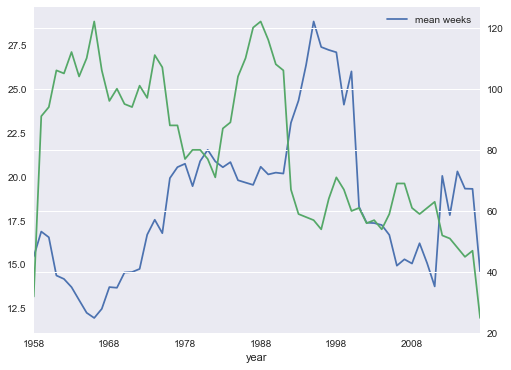

In [171]:
fig,ax = plt.subplots()
song_weeks.groupby('year').mean().plot(ax=ax,kind='line',sharex = True,label='mean weeks')
song_weeks.groupby('year').size().plot(ax=ax,kind='line',sharex = True,secondary_y=True,label='total songs')
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, ['mean weeks','total songs'], loc='best') # why it's not showing the second label?!
plt.show()

Green lines are number of unique songs appeared in the chart, blue lines show average number of weeks within that year. 

We can find something interesting here. 

1.Total unique songs on the billboard chart is decreasing, which means the competition to get on board is not as intense as in the 1980s or 1960s! 

2.However, even if the number of songs competing for top 10 is decreasing, average weeks a song can stay on top 10 chart is decreasing, especially compared to the data in 1990s, where there are more songs than now, and at the same time they stay longer on top 10 chart.

### question5: are songs performed by collaborated artists becoming more popular than before?

In [164]:
artists = top10.artist.values

In [165]:
import re
artist_pairs = map(lambda x:re.split("Featuring | \/ | \&",x),artists)

In [168]:
top10['n_artists'] = [len(i) for i in artist_pairs]

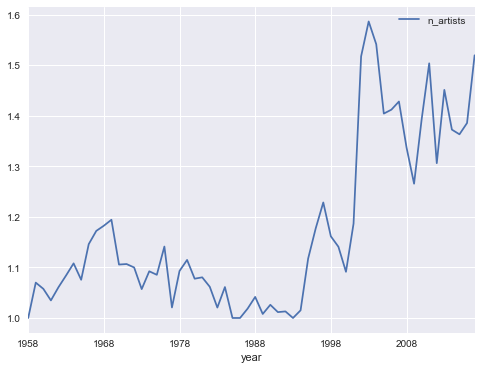

In [210]:
test = top10[['title','n_artists','year']].groupby(['year','title']).mean()
unique_song_table = pd.DataFrame(zip(test.index.get_level_values('year'),test.n_artists),columns = ['year','n_artists'])
unique_song_table.groupby('year').mean().plot(kind='line')

Artists collaboration are helping them get on the top 10 charts!